In [1]:
import numpy as np
import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplt_style_n

plt.style.use(mplt_style_n.style1)

In [2]:
import WaterQualityFunction_plot as wqfp
import WaterQualityFunction_nutrient as wqfn

In [3]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [4]:
df = pd.read_csv('govdat.csv', low_memory=False)

From the report...

Nutrient data, of four different sample point types, has been extracted from the Environment
Agency’s water quality archive (WIMS):

- Freshwater (Used to calculate DAIN and DAIP loads into the estuary).

- STWs/Trade Discharges (Used to calculate DAIN and DAIP loads into the estuary).

- Solent Background (Used to provide background concentrations of N, P and Chl).

- Estuary (Used to provide mean/median values for the estuary that the model is calibrated against).


Legend:

green squares freshwater

blue dots eastuary validation sites

pink triangle sewage discharges

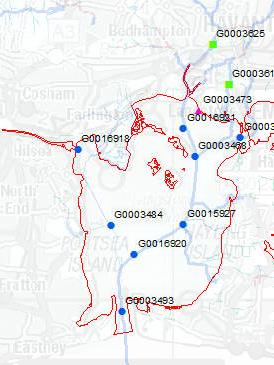

Freshwater (green squares)

G0003616 - R Lavant at IBM Havant

G0003625 - Hermitage Stream – New Road

Estuarine (blue circles)


- G0016918 A2030 Bridge, Langstone

- G0015927 Alpha Buoy Langstone

- G0003493 Langstone Harbour Mouth

- G0016920 Nw Sinah Buoy, Langstone

- G0003467 Langstone Bridge



- G0003468 Langstone Chan Southmoor Point


- G0016921 Entrance to Chldock Lake

- G0003484 Broom Channel Great Salterns




Ammonia: [9993, 111, 119]
    
Nitrogen: [116, 9686, 4925, 114, 9943]

    
Orthophosphate: [9856, 180, 348]



Ammonia: [111]

Nitrogen, Total Oxidised [116, 9943 ]


## loc_subset: to construct the report dataset

In [5]:
list_loc_langstone_estuary = ["G0003493", "G0016920","G0003484","G0016918","G0015927","G0003468","G0003467","G0016921"]

In [6]:
df_report_estuary = wqfn.loc_subset(df, list_loc_langstone_estuary, "notation")

In [7]:
list_loc_langstone_freshwater = ["G0003616", "G0003625"]


In [8]:
df_report_freshwater = wqfn.loc_subset(df, list_loc_langstone_freshwater, "notation")

In [9]:
list_loc_langstone_bkg = ["G0003368", "G0003508","G0003484","G0016873","Y0003370"]

In [10]:
df_report_bkg = wqfn.loc_subset(df, list_loc_langstone_bkg, "notation")

In [11]:
df_langstone_buddsfarm = wqfn.loc_subset(df, "G0003473", location_type = "notation")


In [12]:
df_langstone_report = pd.concat([df_langstone_buddsfarm,df_report_freshwater, df_report_estuary, df_report_bkg])

In [86]:
df


,Unnamed: 0,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,...,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing,month,yr,lat,address,lon
0,0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,BOD ATU,BOD : 5 Day ATU,85,<,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570,3,2000,-1.395030,"London Road, Andover, England SP11 6, GBR",51.216766
1,1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,Ammonia(N),Ammoniacal Nitrogen as N,111,<,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570,3,2000,-1.395030,"London Road, Andover, England SP11 6, GBR",51.216766
2,2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,pH,pH,61,NaN,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570,3,2000,-1.395030,"London Road, Andover, England SP11 6, GBR",51.216766
3,3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,Chloride Ion,Chloride,172,NaN,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570,3,2000,-1.395030,"London Road, Andover, England SP11 6, GBR",51.216766
4,4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-19801A08,APSLEY FARM BOREHOLE A,2000-03-22T10:30:00,COD as O2,Chemical Oxygen Demand :- {COD},92,NaN,...,UNCODED,False,WASTE MONITORING (AGENCY AUDIT - PERMIT),442350,146570,3,2000,-1.395030,"London Road, Andover, England SP11 6, GBR",51.216766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3892352,3892352,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0017594,MEDINA ESTUARY BENTHIC SEDIMENTS,2022-07-18T14:28:00,Time Hi-Tide,Time of high tide,4,NaN,...,ESTUARY SEDIMENT,False,PLANNED INVESTIGATION (LOCAL MONITORING),450300,94000,7,2022,-1.288472,", Isle of Wight, England PO30 5, GBR",50.743436
3892353,3892353,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0017594,MEDINA ESTUARY BENTHIC SEDIMENTS,2022-07-18T14:28:00,phi 7.5-8.0,Grain Size Fraction : phi 7.5 to 8.0,7484,NaN,...,ESTUARY SEDIMENT,False,PLANNED INVESTIGATION (LOCAL MONITORING),450300,94000,7,2022,-1.288472,", Isle of Wight, England PO30 5, GBR",50.743436
3892354,3892354,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0017594,MEDINA ESTUARY BENTHIC SEDIMENTS,2022-07-18T14:28:00,GSF >63000,Grain Size : >63000 microns,4131,NaN,...,ESTUARY SEDIMENT,False,PLANNED INVESTIGATION (LOCAL MONITORING),450300,94000,7,2022,-1.288472,", Isle of Wight, England PO30 5, GBR",50.743436
3892355,3892355,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-Y0017594,MEDINA ESTUARY BENTHIC SEDIMENTS,2022-07-18T14:28:00,phi 8.0-8.5,Grain Size Fraction : phi 8.0 to 8.5,7485,NaN,...,ESTUARY SEDIMENT,False,PLANNED INVESTIGATION (LOCAL MONITORING),450300,94000,7,2022,-1.288472,", Isle of Wight, England PO30 5, GBR",50.743436


## plot_location_nutrientVStime:  for freshwater, estuary, sewage discharge

Nutrient data were retrieved from the Environment Agency’s water quality archive (WIMS) for the following determinands:

- 0111 Ammonia (N), mg/l

- 0116 N Oxidised, mg/l

- 0117 Nitrate (N), mg/l

- 0118 Nitrite (N), mg/l

- 0180 Orthophospht, mg/l

- 9856 OrthophsFilt, mg/l

- 9942 N Oxid Filt, mg/l

- 9993 NH3 filt N, mg/l

In [13]:
plot_params_fw = {'linewidth': 1.5, 'c': 'None', 'linestyle':'--'}
scatter_params_fw = {'facecolor':'green','edgecolor':'#458B74', 'marker':'o', 's':40, 'alpha':0.3}

In [14]:
plot_params_es = {'linewidth': 1.5, 'c': 'None', 'linestyle':'-', 'alpha':0.8}
scatter_params_es = {'facecolor':'#00008B','edgecolor':'#00008B', 'marker':'s', 's':35, 'alpha':0.3}

In [15]:
plot_params_sew = {'linewidth': 1.5, 'c': 'None', 'linestyle':':'}
scatter_params_sew = {'facecolor':'#8B2252','edgecolor':'#8B2252', 'marker':'^', 's':50, 'alpha':0.4}

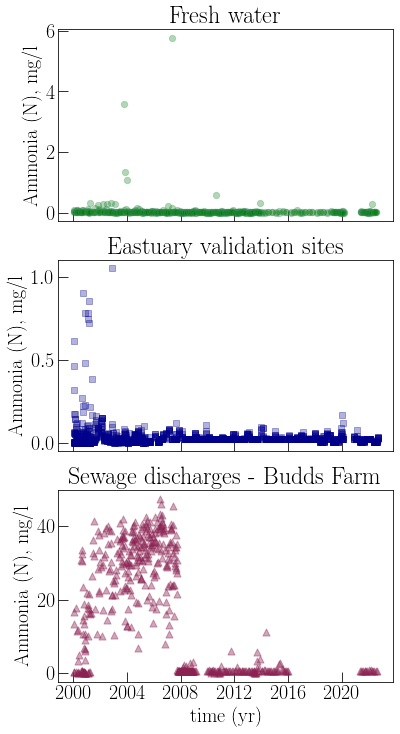

In [16]:
fig, axes = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(6, 12))


wqfp.plot_location_nutrientVStime_customizable(df_report_freshwater, "", [9993, 111, 119], ax=axes[0],plt_kwargs=plot_params_fw, sct_kwargs=scatter_params_fw );
axes[0].set_title("Fresh water")
axes[0].set_ylabel("Ammonia (N), mg/l")

wqfp.plot_location_nutrientVStime_customizable(df_report_estuary, "", [9993, 111, 119], ax=axes[1],  plt_kwargs=plot_params_es, sct_kwargs=scatter_params_es );
axes[1].set_title("Eastuary validation sites")
axes[1].set_ylabel("Ammonia (N), mg/l")


wqfp.plot_location_nutrientVStime_customizable(df_langstone_buddsfarm, "", [9993, 111, 119], ax=axes[2], plt_kwargs=plot_params_sew, sct_kwargs=scatter_params_sew );
axes[2].set_title("Sewage discharges - Budds Farm")

axes[2].set_ylabel("Ammonia (N), mg/l")
axes[2].set_xlabel("time (yr)")


fig.savefig("./Plots/ammonia.png", facecolor='white', transparent=False, bbox_inches = 'tight')

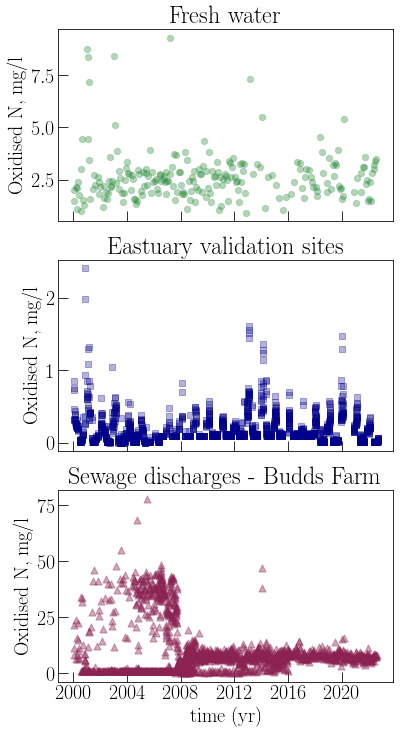

In [17]:
fig, axes = plt.subplots(nrows=3,ncols=1, sharex=True, figsize=(6, 12))


wqfp.plot_location_nutrientVStime_customizable(df_report_freshwater, "", [116, 9686, 4925, 114, 9943], ax=axes[0],plt_kwargs=plot_params_fw, sct_kwargs=scatter_params_fw );
axes[0].set_title("Fresh water")
axes[0].set_ylabel("Oxidised N, mg/l")

wqfp.plot_location_nutrientVStime_customizable(df_report_estuary, "", [116, 9686, 4925, 114, 9943], ax=axes[1],  plt_kwargs=plot_params_es, sct_kwargs=scatter_params_es );
axes[1].set_title("Eastuary validation sites")
axes[1].set_ylabel("Oxidised N, mg/l")


wqfp.plot_location_nutrientVStime_customizable(df_langstone_buddsfarm, "", [116, 9686, 4925, 114, 9943], ax=axes[2], plt_kwargs=plot_params_sew, sct_kwargs=scatter_params_sew );
axes[2].set_title("Sewage discharges - Budds Farm")

axes[2].set_ylabel("Oxidised N, mg/l")
axes[2].set_xlabel("time (yr)")

fig.savefig("./Plots/oxidizedN.png",  facecolor='white', transparent=False, bbox_inches = 'tight')

# Plots from the report

We can see seasonal changes dividing the dataset in summer (April to
September) and winter (October to March).

In [18]:
plot_params_3616 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_3616 = {'c':'#EE6A50', 'marker':'+', 's':35, 'alpha':0.85}

plot_params_3625 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_3625 = {'c':'#48D1CC', 'marker':'.', 's':40, 'alpha':0.85}


In [19]:
df_langstone_G0003616 = wqfn.loc_subset(df, "G0003616", "notation")

df_langstone_G0003625 = wqfn.loc_subset(df, "G0003625", "notation")



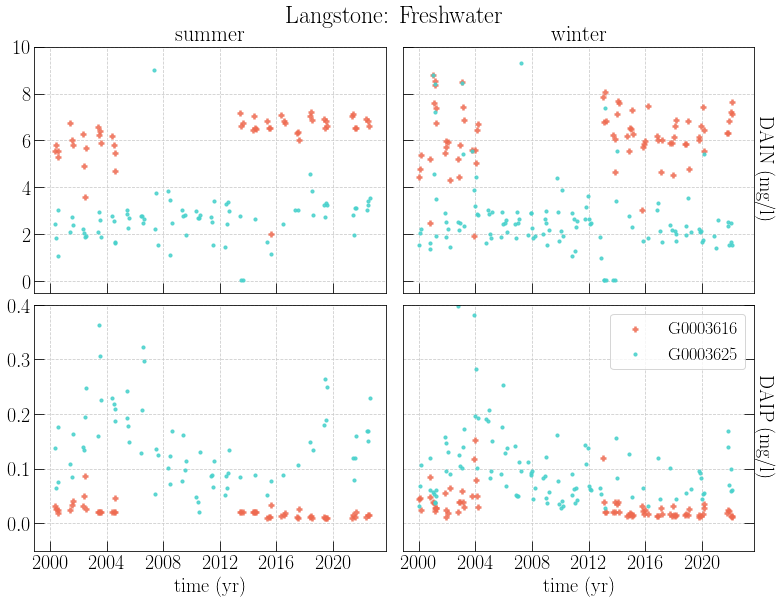

In [20]:
fig, axes = plt.subplots(nrows=2,ncols=2, sharey='row', sharex=True, figsize=(10,7))
#fig.subplots_adjust(hspace=0.)

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)


wqfp.DAIN_summer(df_langstone_G0003616, "", location_type="notation", plt_kwargs_s=plot_params_3616,\
        sct_kwargs_s=scatter_params_3616,ax=axes[0, 0])

wqfp.DAIN_summer(df_langstone_G0003625, "", location_type="notation", plt_kwargs_s=plot_params_3625,\
        sct_kwargs_s=scatter_params_3625,ax=axes[0, 0], plot_title="summer")

wqfp.DAIN_winter(df_langstone_G0003616, "", location_type="notation", plt_kwargs_w=plot_params_3616,\
        sct_kwargs_w=scatter_params_3616,ax=axes[0, 1])

wqfp.DAIN_winter(df_langstone_G0003625,"", location_type="notation", plt_kwargs_w=plot_params_3625,\
                sct_kwargs_w=scatter_params_3625,ax=axes[0, 1], plot_title="winter")

axes[0, 1].yaxis.set_label_position("right")

axes[0, 1].set_ylabel("DAIN (mg/l)", rotation=270, labelpad=20)

axes[0, 1].set_ylim([-.5, 10])
axes[0, 0].set_ylim([-.5, 10])



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003616, "", 180, ax=axes[1, 0],  location_type="notation", plt_kwargs_s=plot_params_3616, sct_kwargs_s=scatter_params_3616);
wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003625, "", 180, ax=axes[1, 0], location_type="notation", plt_kwargs_s=plot_params_3625, sct_kwargs_s=scatter_params_3625);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003616, "", 180, ax=axes[1, 1],  location_type="notation", plt_kwargs_w=plot_params_3616, sct_kwargs_w=scatter_params_3616, label_str="G0003616");
wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003625, "", 180, ax=axes[1, 1], location_type="notation", plt_kwargs_w=plot_params_3625, sct_kwargs_w=scatter_params_3625, label_str="G0003625");
axes[1, 1].yaxis.tick_right()

axes[1, 1].yaxis.set_label_position("right")

axes[1, 1].set_ylabel("DAIP (mg/l)", rotation=270, labelpad=20)

axes[1, 0].set_ylim([-.05, 0.4])
axes[1, 1].set_ylim([-.05, 0.4])
axes[1, 1].set_xlabel("time (yr)")
axes[1, 0].set_xlabel("time (yr)")

axes[0, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 1].grid(which='major', color='#CCCCCC', linestyle='--')
fig.suptitle(x=0.5, y=1.08, t="Langstone: Freshwater", fontsize=24);


fig.savefig("./Plots/freshwater.png",  facecolor='white', transparent=False, bbox_inches = 'tight')

### Figure 3 in report:


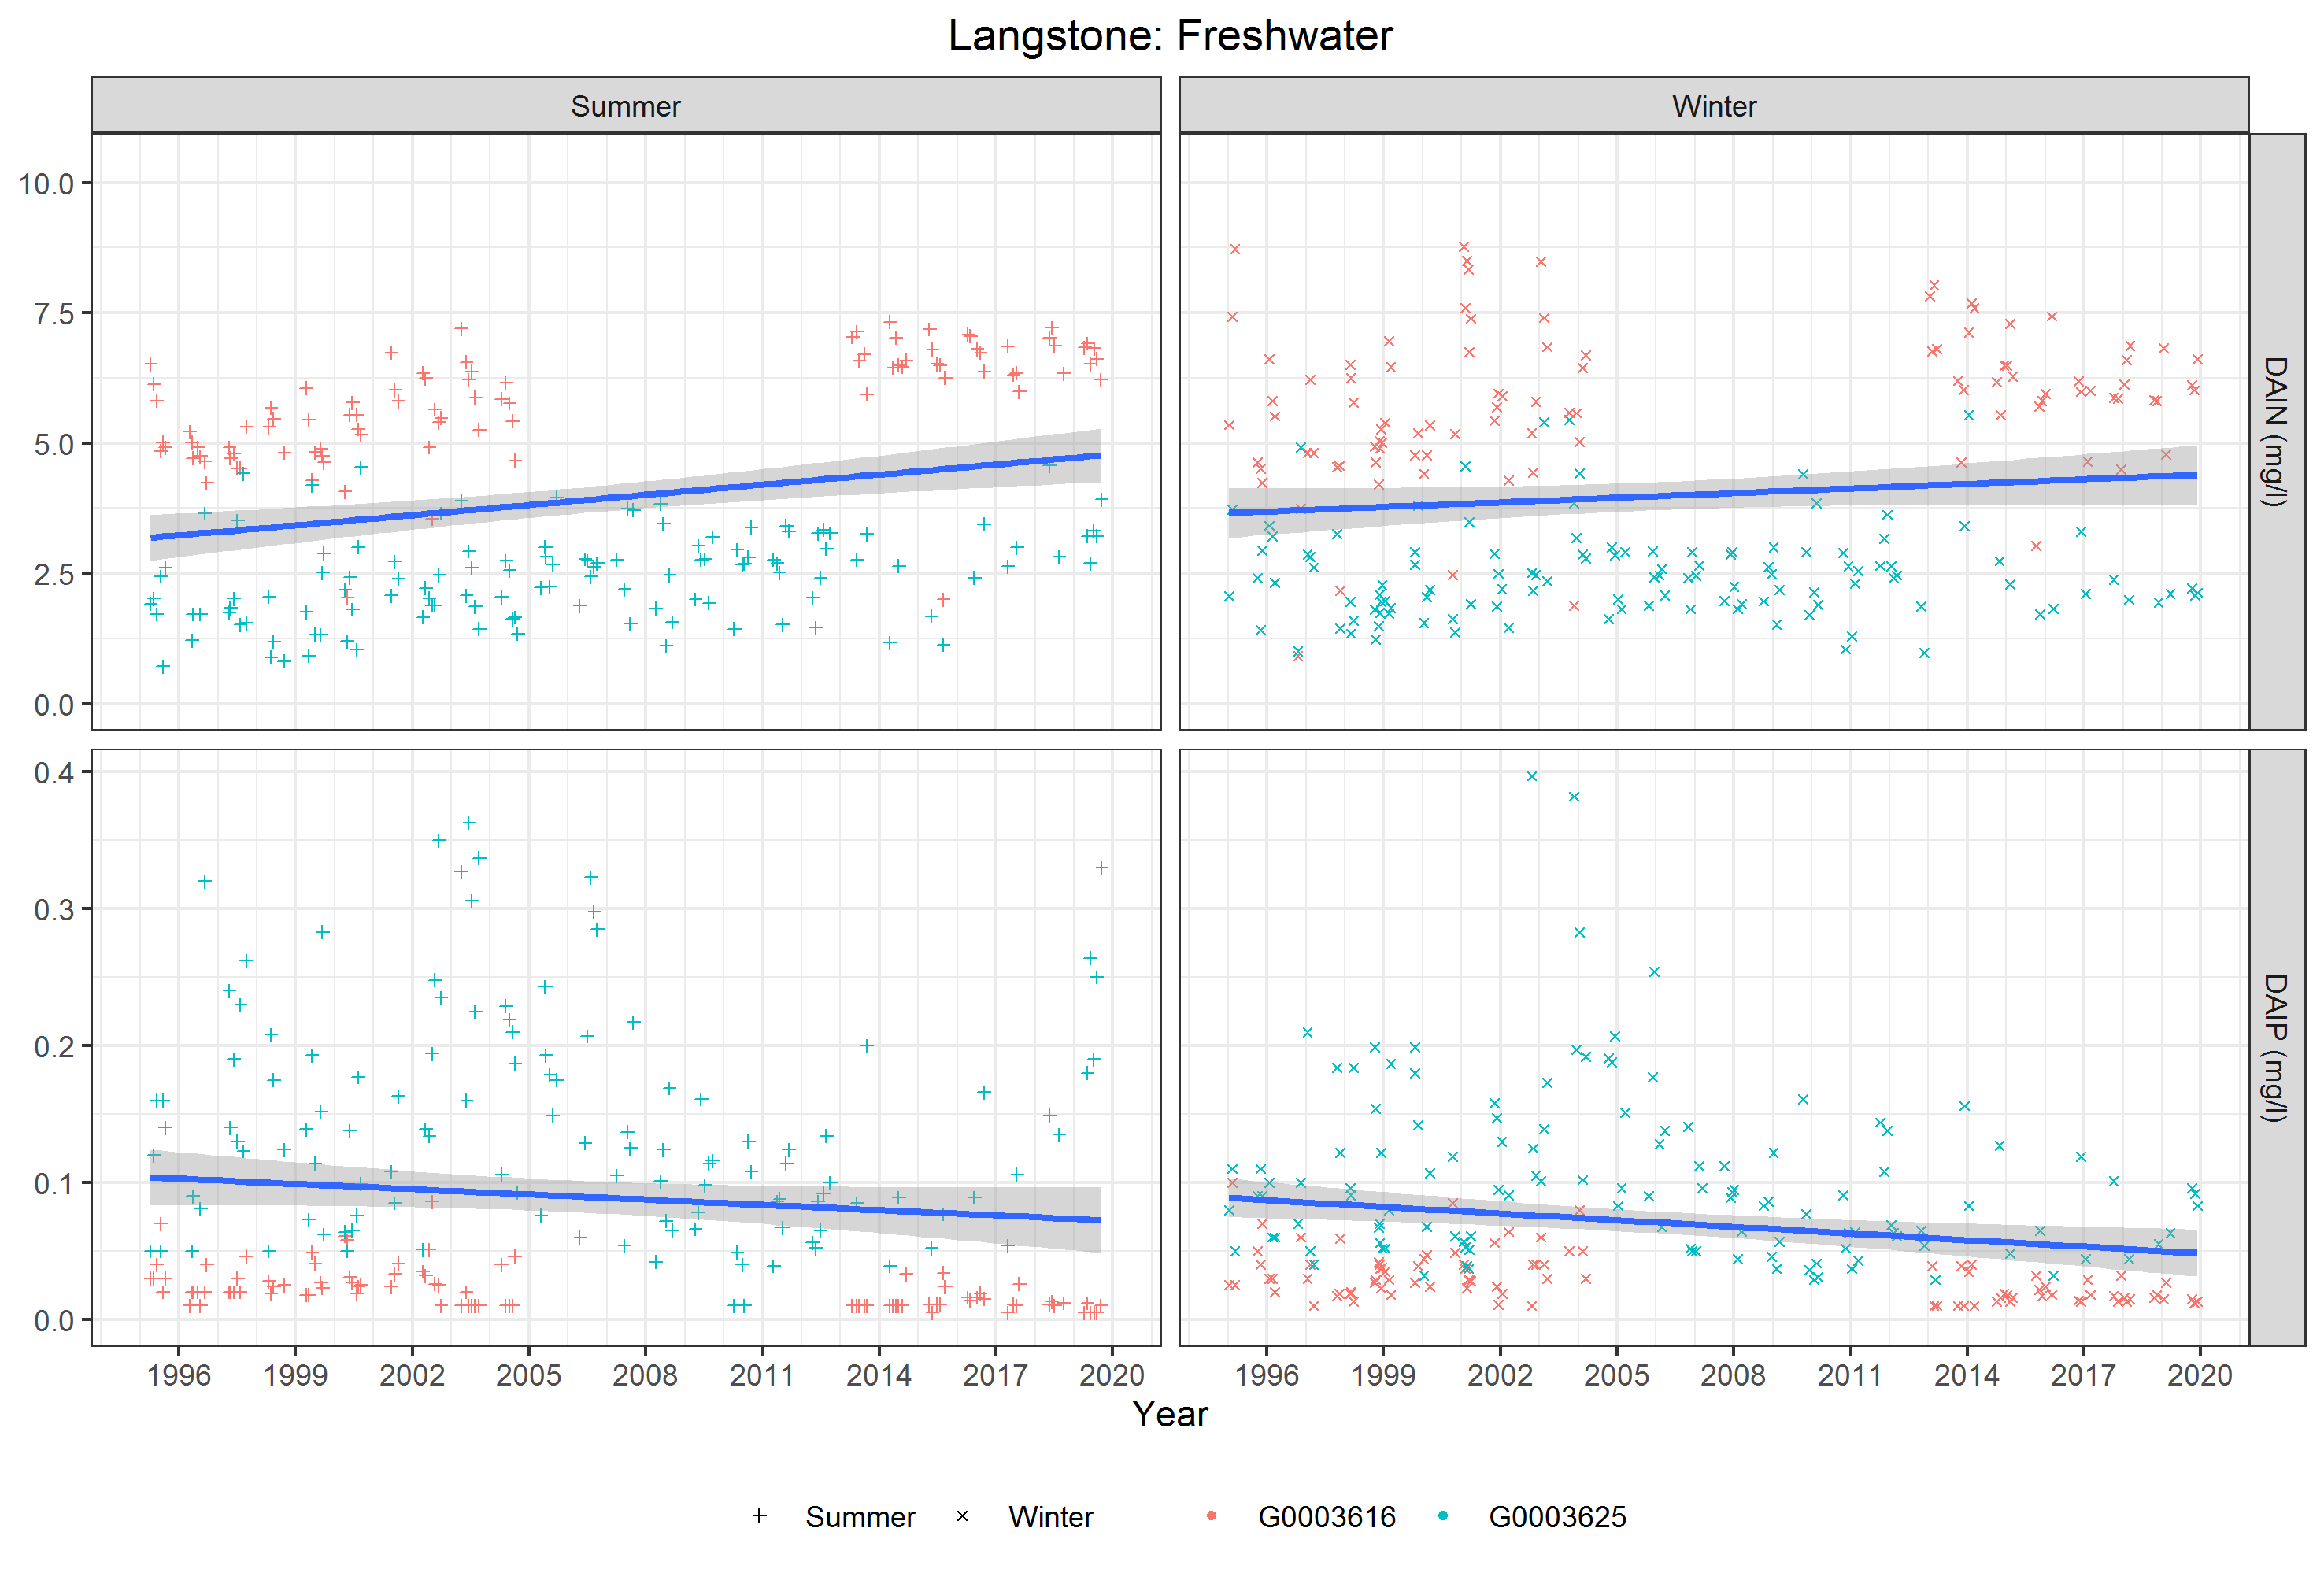

In [21]:
plot_params_buddsfarm = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_buddsfarm = {'c':'#EE6A50', 'marker':'+', 's':35, 'alpha':0.85}


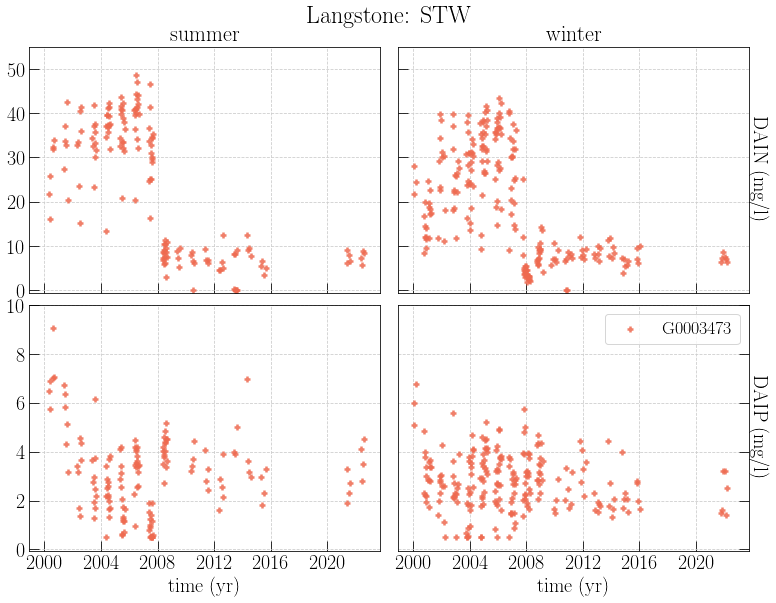

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2, sharey='row', sharex=True, figsize=(10,7))
#fig.subplots_adjust(hspace=0.)

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)




wqfp.DAIN_summer(df_langstone_buddsfarm, "", location_type="notation", plt_kwargs_s=plot_params_buddsfarm,\
        sct_kwargs_s=scatter_params_buddsfarm, ax=axes[0, 0], plot_title="summer")


wqfp.DAIN_winter(df_langstone_buddsfarm,"", location_type="notation", plt_kwargs_w=plot_params_buddsfarm,\
                sct_kwargs_w=scatter_params_buddsfarm,ax=axes[0, 1], plot_title="winter")

axes[0, 1].yaxis.set_label_position("right")

axes[0, 1].set_ylabel("DAIN (mg/l)", rotation=270, labelpad=20)

axes[0, 1].set_ylim([-.5, 55])
axes[0, 0].set_ylim([-.5, 55])



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_buddsfarm, "", 180, ax=axes[1, 0], location_type="notation", plt_kwargs_s=plot_params_buddsfarm, sct_kwargs_s=scatter_params_buddsfarm);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_buddsfarm, "", 180, ax=axes[1, 1], location_type="notation", plt_kwargs_w=plot_params_buddsfarm, sct_kwargs_w=scatter_params_buddsfarm, label_str="G0003473");
axes[1, 1].yaxis.tick_right()

axes[1, 1].yaxis.set_label_position("right")

axes[1, 1].set_ylabel("DAIP (mg/l)", rotation=270, labelpad=20)


axes[0, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 0].set_ylim([-.05, 10])
axes[1, 1].set_ylim([-.05, 10])

axes[1, 1].set_xlabel("time (yr)")
axes[1, 0].set_xlabel("time (yr)")
fig.suptitle(x=0.5, y=1.08, t="Langstone: STW", fontsize=24);

fig.savefig("./Plots/buddsfarm.png",  facecolor='white', transparent=False, bbox_inches = 'tight')

### Figure 4 in report:


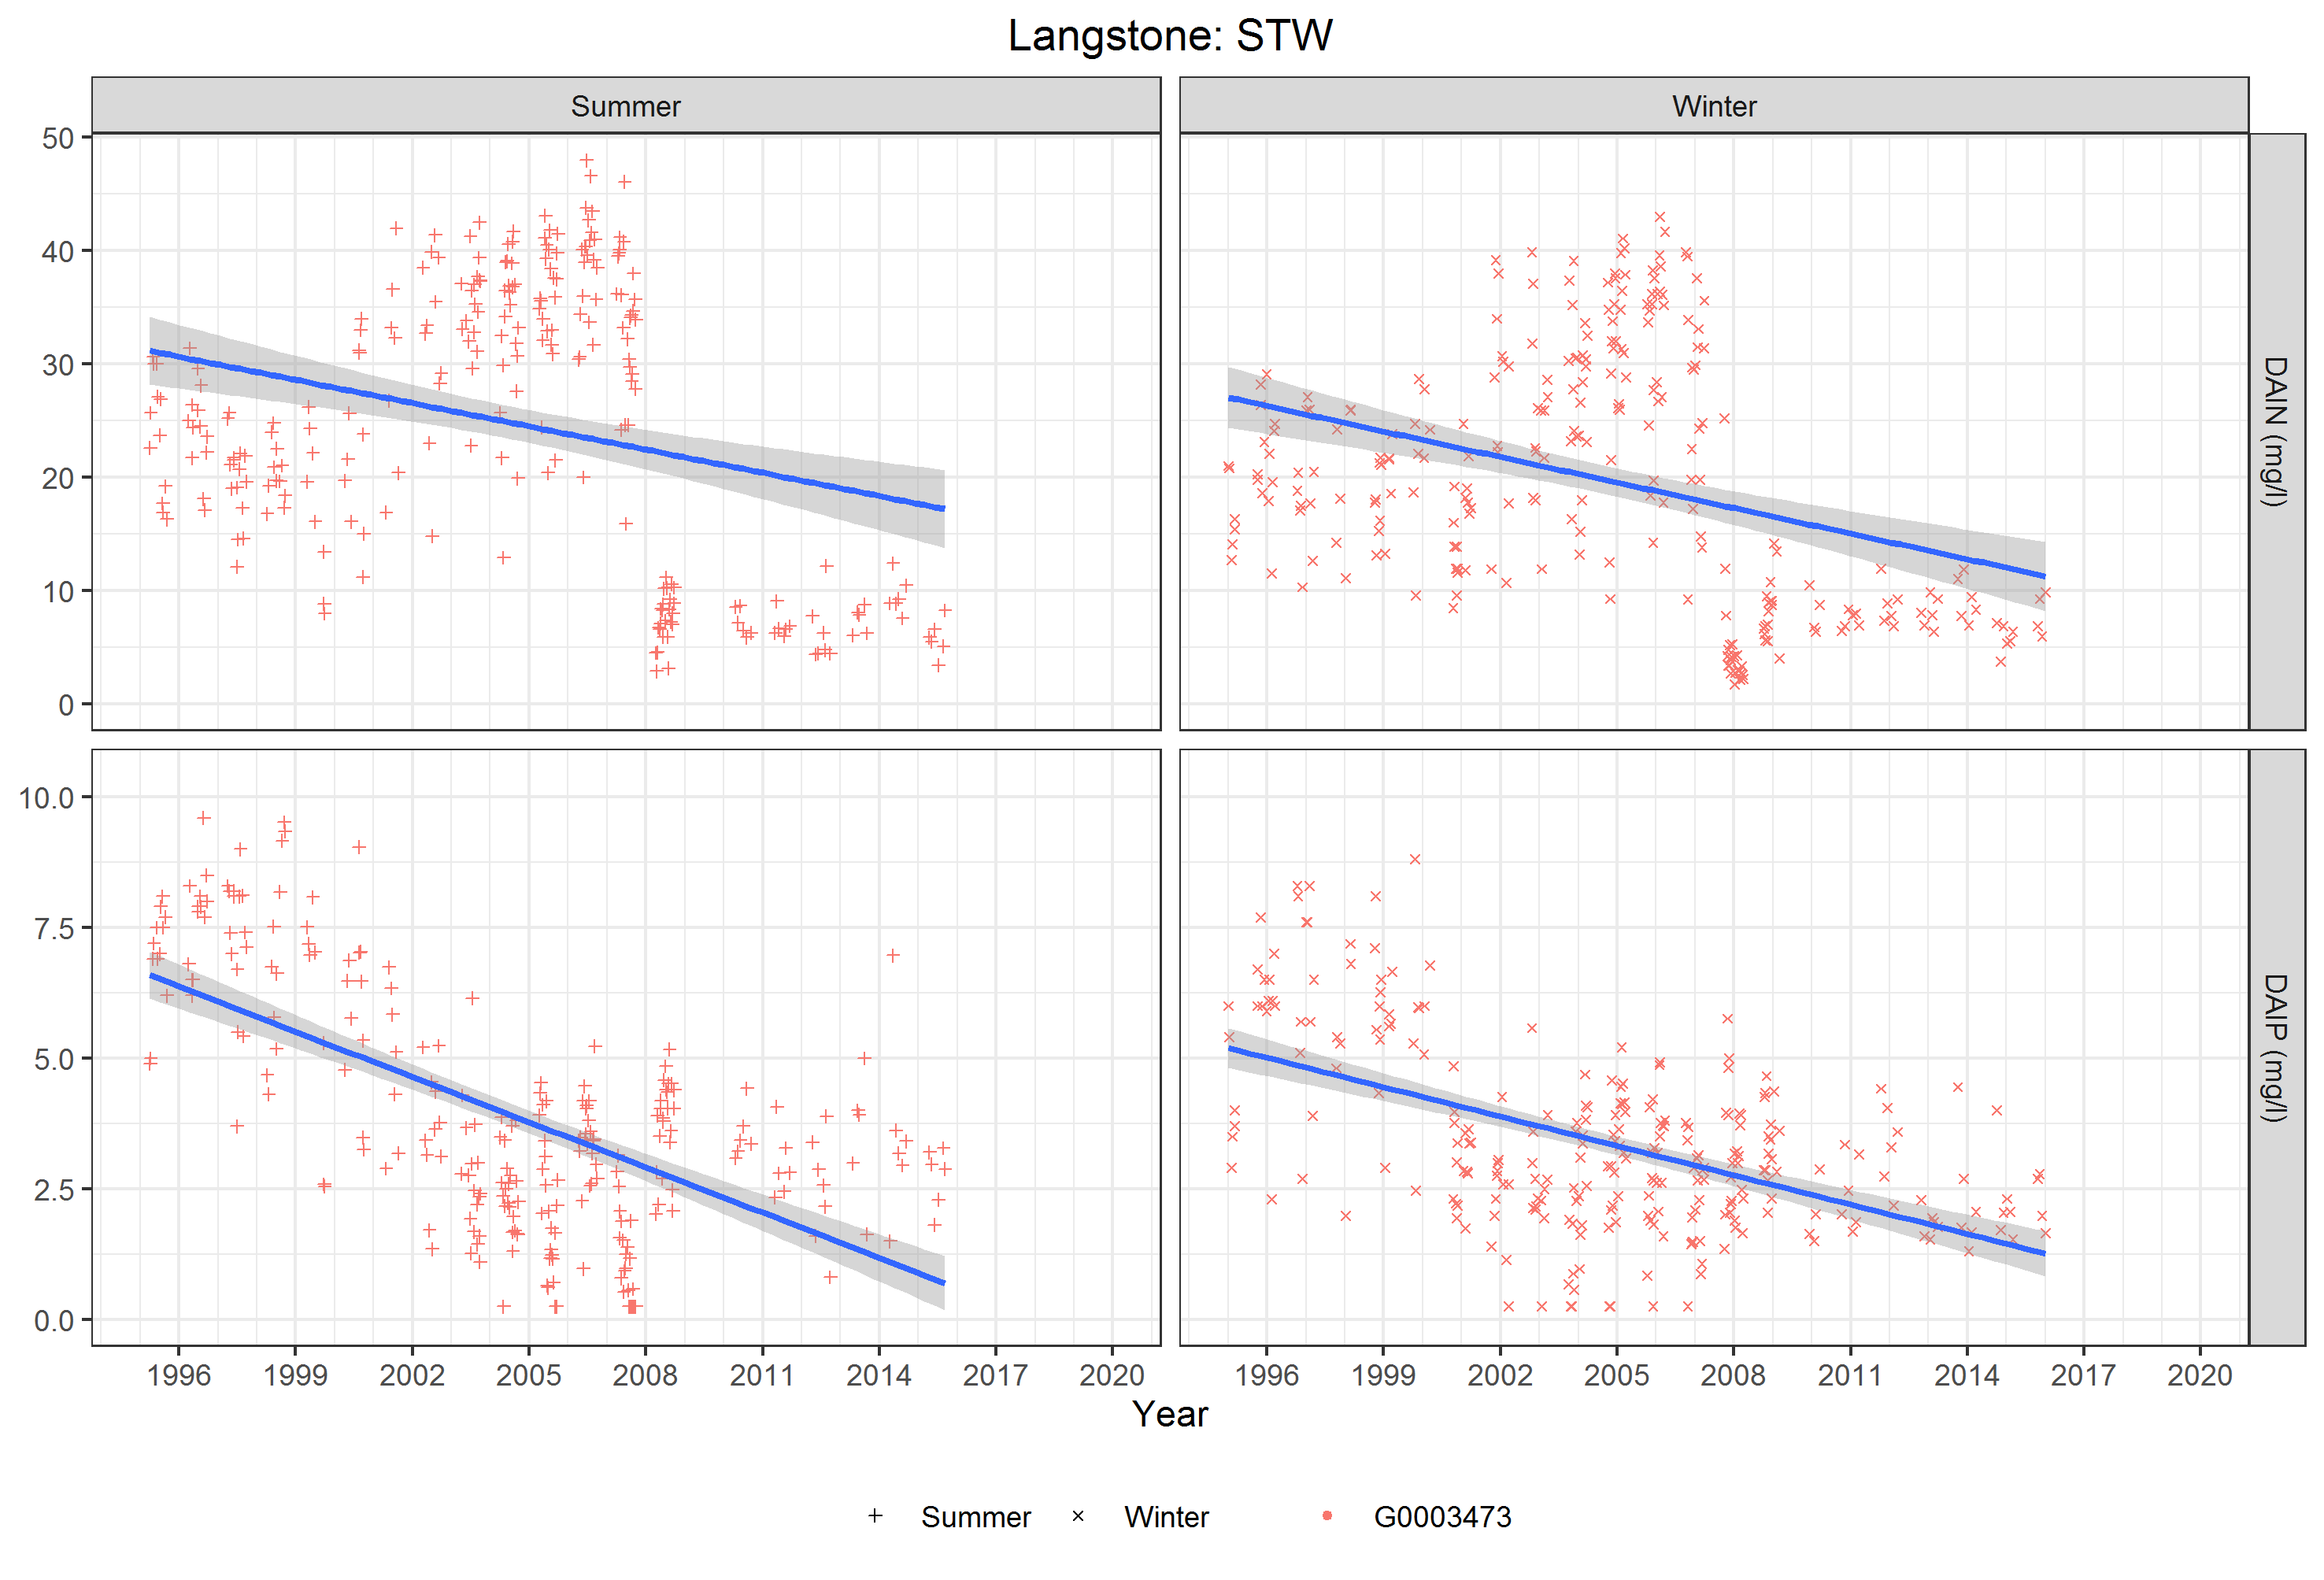


In [23]:
plot_params_G0003368 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_G0003368 = {'c':'#EE6A50', 'marker':'o', 's':35, 'alpha':0.85}



plot_params_G0003508 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_G0003508 = {'c':'#A2CD5A', 'marker':'o', 's':35, 'alpha':0.85}

In [24]:
plot_params_G0016873 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_G0016873 = {'c':'#8DEEEE', 'marker':'o', 's':35, 'alpha':0.85}

In [25]:
plot_params_Y0003370 = {'linewidth': 2, 'c': 'None', 'linestyle':'None'}
scatter_params_Y0003370 = {'c':'#8B3A62', 'marker':'o', 's':35, 'alpha':0.85}

In [26]:
df_langstone_G0003368 = wqfn.loc_subset(df, "G0003368", "notation")

df_langstone_G0003508 = wqfn.loc_subset(df, "G0003508", "notation")


df_langstone_G0016873 = wqfn.loc_subset(df, "G0016873", "notation")

df_langstone_Y0003370 = wqfn.loc_subset(df, "Y0003370", "notation")

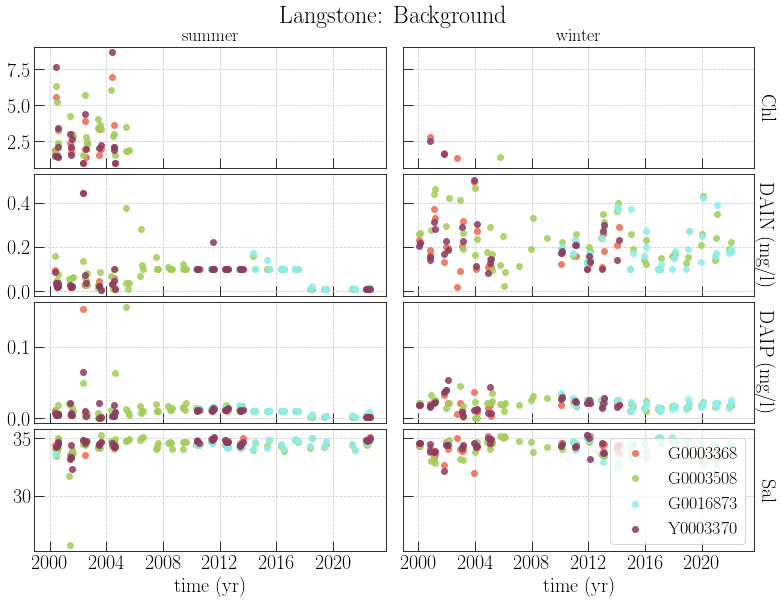

In [28]:
fig, axes = plt.subplots(nrows=4,ncols=2, sharey='row', sharex=True, figsize=(10,7))
#fig.subplots_adjust(hspace=0.)

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)


wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003368, "", 947, ax=axes[0, 0], location_type="notation", plt_kwargs_s=plot_params_G0003368, sct_kwargs_s=scatter_params_G0003368, plot_title="summer");


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003368, "", 947, ax=axes[0, 1], location_type="notation", plt_kwargs_w=plot_params_G0003368, sct_kwargs_w=scatter_params_G0003368, plot_title="winter");



wqfp.DAIN_summer(df_langstone_G0003368, "", location_type="notation", plt_kwargs_s=plot_params_G0003508,\
        sct_kwargs_s=scatter_params_G0003368, ax=axes[1, 0])


wqfp.DAIN_winter(df_langstone_G0003368,"", location_type="notation", plt_kwargs_w=plot_params_G0003508,\
                sct_kwargs_w=scatter_params_G0003368,ax=axes[1, 1])



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003368, "",  [9856, 180, 348], ax=axes[2, 0], location_type="notation", plt_kwargs_s=plot_params_G0003368, sct_kwargs_s=scatter_params_G0003368);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003368, "",  [9856, 180, 348], ax=axes[2, 1], location_type="notation", plt_kwargs_w=plot_params_G0003368, sct_kwargs_w=scatter_params_G0003368);



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003368, "", 7608, ax=axes[3, 0], location_type="notation", plt_kwargs_s=plot_params_G0003368, sct_kwargs_s=scatter_params_G0003368);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003368, "", 7608, ax=axes[3, 1], location_type="notation", plt_kwargs_w=plot_params_G0003368, sct_kwargs_w=scatter_params_G0003368, label_str="G0003368");


######
wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003508, "", 947, ax=axes[0, 0], location_type="notation", plt_kwargs_s=plot_params_G0003508, sct_kwargs_s=scatter_params_G0003508, plot_title="summer");


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003508, "", 947, ax=axes[0, 1], location_type="notation", plt_kwargs_w=plot_params_G0003508, sct_kwargs_w=scatter_params_G0003508, plot_title="winter");


wqfp.DAIN_summer(df_langstone_G0003508, "", location_type="notation", plt_kwargs_s=plot_params_G0003508,\
        sct_kwargs_s=scatter_params_G0003508, ax=axes[1, 0])


wqfp.DAIN_winter(df_langstone_G0003508,"", location_type="notation", plt_kwargs_w=plot_params_G0003508,\
                sct_kwargs_w=scatter_params_G0003508,ax=axes[1, 1])



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003508, "", [9856, 180, 348], ax=axes[2, 0], location_type="notation", plt_kwargs_s=plot_params_G0003508, sct_kwargs_s=scatter_params_G0003508);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003508, "", [9856, 180, 348], ax=axes[2, 1], location_type="notation", plt_kwargs_w=plot_params_G0003508, sct_kwargs_w=scatter_params_G0003508);



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0003508, "", 7608, ax=axes[3, 0], location_type="notation", plt_kwargs_s=plot_params_G0003508, sct_kwargs_s=scatter_params_G0003508);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0003508, "", 7608, ax=axes[3, 1], location_type="notation", plt_kwargs_w=plot_params_G0003508, sct_kwargs_w=scatter_params_G0003508, label_str="G0003508");


######


wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0016873, "", 947, ax=axes[0, 0], location_type="notation", plt_kwargs_s=plot_params_G0016873, sct_kwargs_s=scatter_params_G0016873, plot_title="summer");


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0016873, "", 947, ax=axes[0, 1], location_type="notation", plt_kwargs_w=plot_params_G0016873, sct_kwargs_w=scatter_params_G0016873, plot_title="winter");


wqfp.DAIN_summer(df_langstone_G0016873, "", location_type="notation", plt_kwargs_s=plot_params_G0016873,\
        sct_kwargs_s=scatter_params_G0016873, ax=axes[1, 0])


wqfp.DAIN_winter(df_langstone_G0016873,"", location_type="notation", plt_kwargs_w=plot_params_G0016873,\
                sct_kwargs_w=scatter_params_G0016873,ax=axes[1, 1])



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0016873, "", [9856, 180, 348], ax=axes[2, 0], location_type="notation", plt_kwargs_s=plot_params_G0016873, sct_kwargs_s=scatter_params_G0016873);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0016873, "", [9856, 180, 348], ax=axes[2, 1], location_type="notation", plt_kwargs_w=plot_params_G0016873, sct_kwargs_w=scatter_params_G0016873);



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_G0016873, "", 7608, ax=axes[3, 0], location_type="notation", plt_kwargs_s=plot_params_G0016873, sct_kwargs_s=scatter_params_G0016873);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_G0016873, "", 7608, ax=axes[3, 1], location_type="notation", plt_kwargs_w=plot_params_G0016873, sct_kwargs_w=scatter_params_G0016873, label_str="G0016873");


#########

wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_Y0003370, "", 947, ax=axes[0, 0], location_type="notation", plt_kwargs_s=plot_params_Y0003370, sct_kwargs_s=scatter_params_Y0003370, plot_title="summer");


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_Y0003370, "", 947, ax=axes[0, 1], location_type="notation", plt_kwargs_w=plot_params_Y0003370, sct_kwargs_w=scatter_params_Y0003370, plot_title="winter");


wqfp.DAIN_summer(df_langstone_Y0003370, "", location_type="notation", plt_kwargs_s=plot_params_Y0003370,\
        sct_kwargs_s=scatter_params_Y0003370, ax=axes[1, 0])


wqfp.DAIN_winter(df_langstone_Y0003370,"", location_type="notation", plt_kwargs_w=plot_params_Y0003370,\
                sct_kwargs_w=scatter_params_Y0003370,ax=axes[1, 1])



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_Y0003370, "", [9856, 180, 348], ax=axes[2, 0], plt_kwargs_s=plot_params_Y0003370, sct_kwargs_s=scatter_params_Y0003370);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_Y0003370, "", [9856, 180, 348] , ax=axes[2, 1],  plt_kwargs_w=plot_params_Y0003370,\
                sct_kwargs_w=scatter_params_Y0003370);



wqfp.plot_location_nutrientVStime_customizable_summer(df_langstone_Y0003370, "", 7608, ax=axes[3, 0], location_type="notation", plt_kwargs_s=plot_params_Y0003370, sct_kwargs_s=scatter_params_Y0003370);


wqfp.plot_location_nutrientVStime_customizable_winter(df_langstone_Y0003370, "", 7608, ax=axes[3, 1], location_type="notation", plt_kwargs_w=plot_params_Y0003370, sct_kwargs_w=scatter_params_Y0003370, label_str="Y0003370");


#########




axes[0, 1].yaxis.set_label_position("right")
axes[1, 1].yaxis.set_label_position("right")
axes[2, 1].yaxis.set_label_position("right")
axes[3, 1].yaxis.set_label_position("right")


axes[0, 1].set_ylabel("Chl", rotation=270, labelpad=20)
axes[1, 1].set_ylabel("DAIN (mg/l)", rotation=270, labelpad=20)
axes[2, 1].set_ylabel("DAIP (mg/l)", rotation=270, labelpad=20)
axes[3, 1].set_ylabel("Sal", rotation=270, labelpad=20)




axes[0, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1, 1].grid(which='major', color='#CCCCCC', linestyle='--')

axes[2, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[2, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[3, 0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[3, 1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[3, 1].set_xlabel("time (yr)")
axes[3, 0].set_xlabel("time (yr)")

fig.suptitle(x=0.5, y=1.08, t="Langstone: Background", fontsize=24);


fig.savefig("./Plots/background.png",  facecolor='white', transparent=False, bbox_inches = 'tight')

### Figure 5 in report:



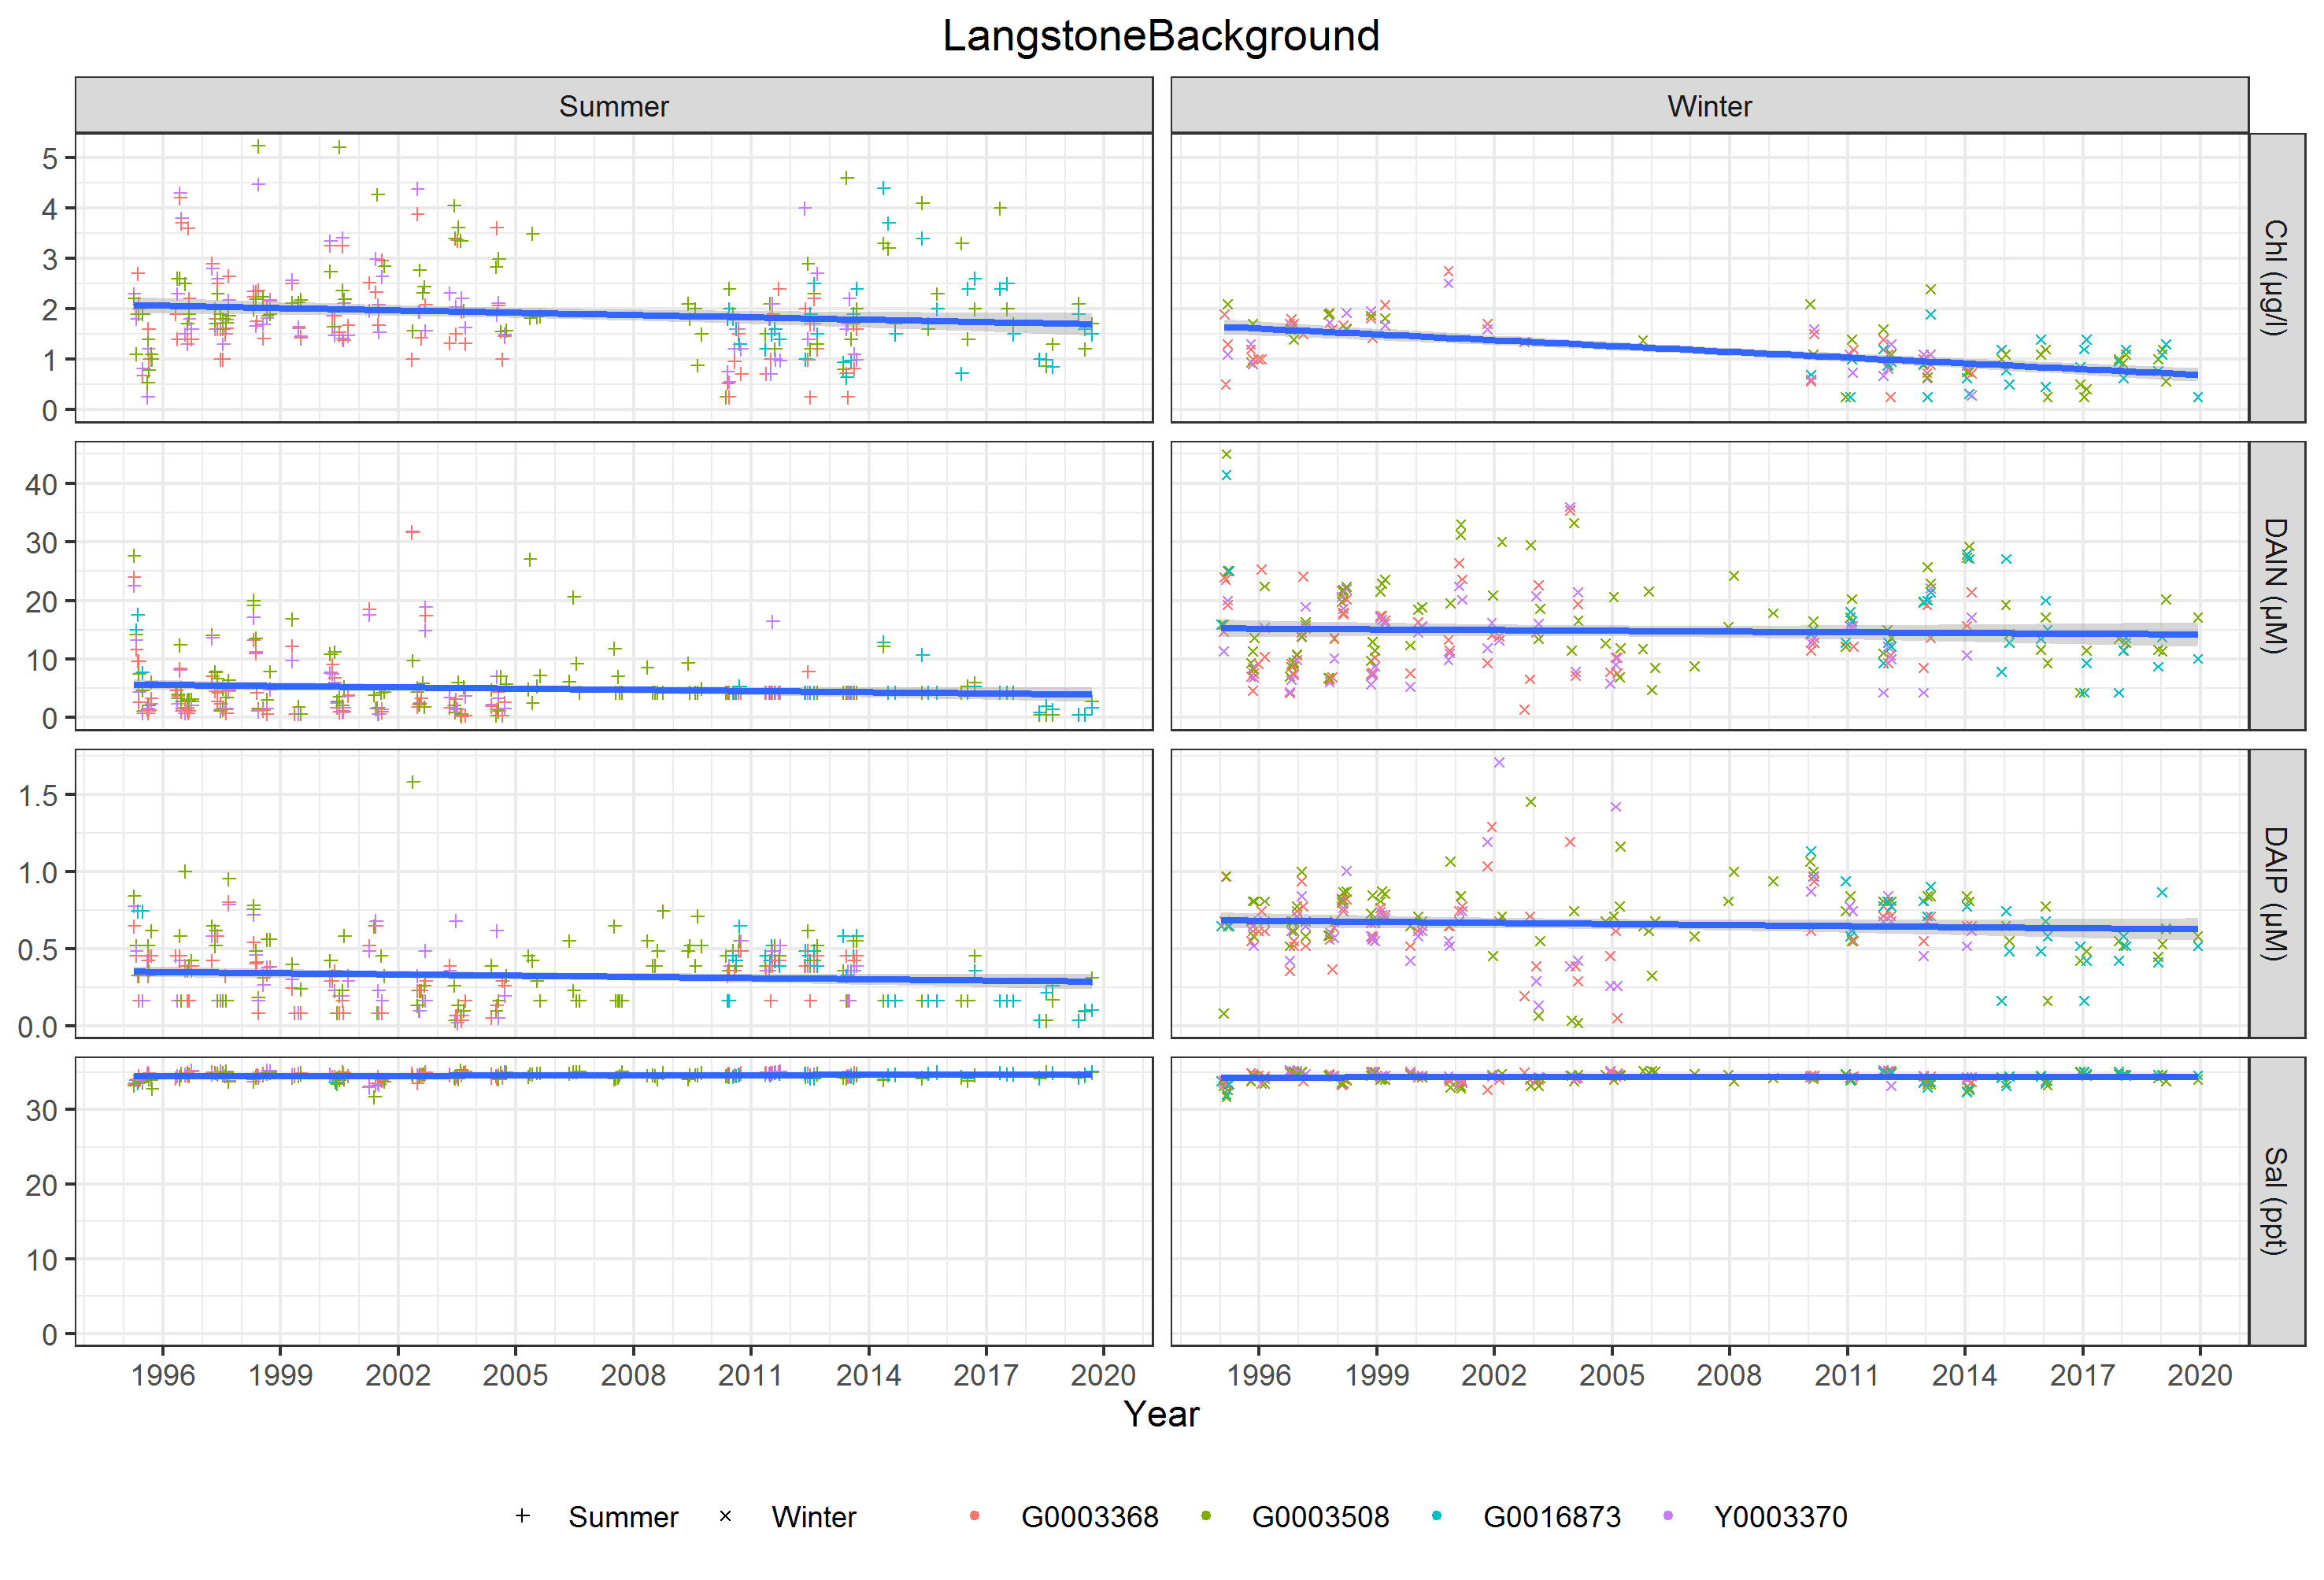


## Report: Present day (2015-2019) VS. Baseline (1997-2000)

In [29]:
# we do not have data before 2000, so I'm now using =<2003

In [30]:
df_langstone_G0003493 = wqfn.loc_subset(df, "G0003493", "notation")


In [31]:
df_langstone_G0016920 = wqfn.loc_subset(df, "G0016920", "notation")


In [32]:
df_langstone_G0003484 = wqfn.loc_subset(df, "G0003484", "notation")


In [33]:
df_langstone_G0016918 = wqfn.loc_subset(df, "G0016918", "notation")


In [34]:
df_langstone_G0015927 = wqfn.loc_subset(df, "G0015927", "notation")


In [35]:
df_langstone_G0003468 = wqfn.loc_subset(df, "G0003468", "notation")


In [36]:
df_langstone_G0003467 = wqfn.loc_subset(df, "G0003467", "notation")


In [37]:
df_langstone_G0016921 = wqfn.loc_subset(df, "G0016921", "notation")


In [38]:
site_df_list = [df_langstone_G0003493, df_langstone_G0016920, df_langstone_G0003484, df_langstone_G0016918, df_langstone_G0015927, \
               df_langstone_G0003468, df_langstone_G0003467, df_langstone_G0016921]

In [39]:
dain_summer_mean_bl = []
dain_summer_median_bl = []
dain_winter_mean_bl = []
dain_winter_median_bl = []

In [40]:
for df_ in site_df_list:
    dain_summer_mean_bl.append(np.mean(wqfn.DAIN_time_seasons(df_[df_["yr"]<=2003], "", location_type="label")[1]))
    dain_summer_median_bl.append(np.median(wqfn.DAIN_time_seasons(df_[df_["yr"]<=2003], "", location_type="label")[1]))
    
    dain_winter_mean_bl.append(np.mean(wqfn.DAIN_time_seasons(df_[df_["yr"]<=2003], "", location_type="label")[3]))
    dain_winter_median_bl.append(np.median(wqfn.DAIN_time_seasons(df_[df_["yr"]<=2003], "", location_type="label")[3]))

In [41]:
dain_summer_mean_pd = []
dain_summer_median_pd = []
dain_winter_mean_pd = []
dain_winter_median_pd = []

In [43]:
for df_ in site_df_list:
    dain_summer_mean_pd.append(np.mean(wqfn.DAIN_time_seasons(df_[df_["yr"]>=2015], "", location_type="label")[1]))
    dain_summer_median_pd.append(np.median(wqfn.DAIN_time_seasons(df_[df_["yr"]>=2015], "", location_type="label")[1]))
    
    dain_winter_mean_pd.append(np.mean(wqfn.DAIN_time_seasons(df_[df_["yr"]>=2015], "", location_type="label")[3]))
    dain_winter_median_pd.append(np.median(wqfn.DAIN_time_seasons(df_[df_["yr"]>=2015], "", location_type="label")[3]))

In [55]:
daip_summer_mean_bl = []
daip_summer_median_bl = []
daip_winter_mean_bl = []
daip_winter_median_bl = []

In [56]:
for df_ in site_df_list:
    daip_summer_mean_bl.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", [9856, 180, 348],  location_type="label")[1]))
    daip_summer_median_bl.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", [9856, 180, 348],  location_type="label")[1]))
    
    daip_winter_mean_bl.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", [9856, 180, 348],  location_type="label")[3]))
    daip_winter_median_bl.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", [9856, 180, 348], location_type="label")[3]))

In [57]:
daip_summer_mean_pd = []
daip_summer_median_pd = []
daip_winter_mean_pd = []
daip_winter_median_pd = []

In [58]:
for df_ in site_df_list:
    daip_summer_mean_pd.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "", [9856, 180, 348],  location_type="label")[1]))
    daip_summer_median_pd.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",[9856, 180, 348], location_type="label")[1]))
    
    daip_winter_mean_pd.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",[9856, 180, 348],  location_type="label")[3]))
    daip_winter_median_pd.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",[9856, 180, 348], location_type="label")[3]))

### Figure 6 in report:



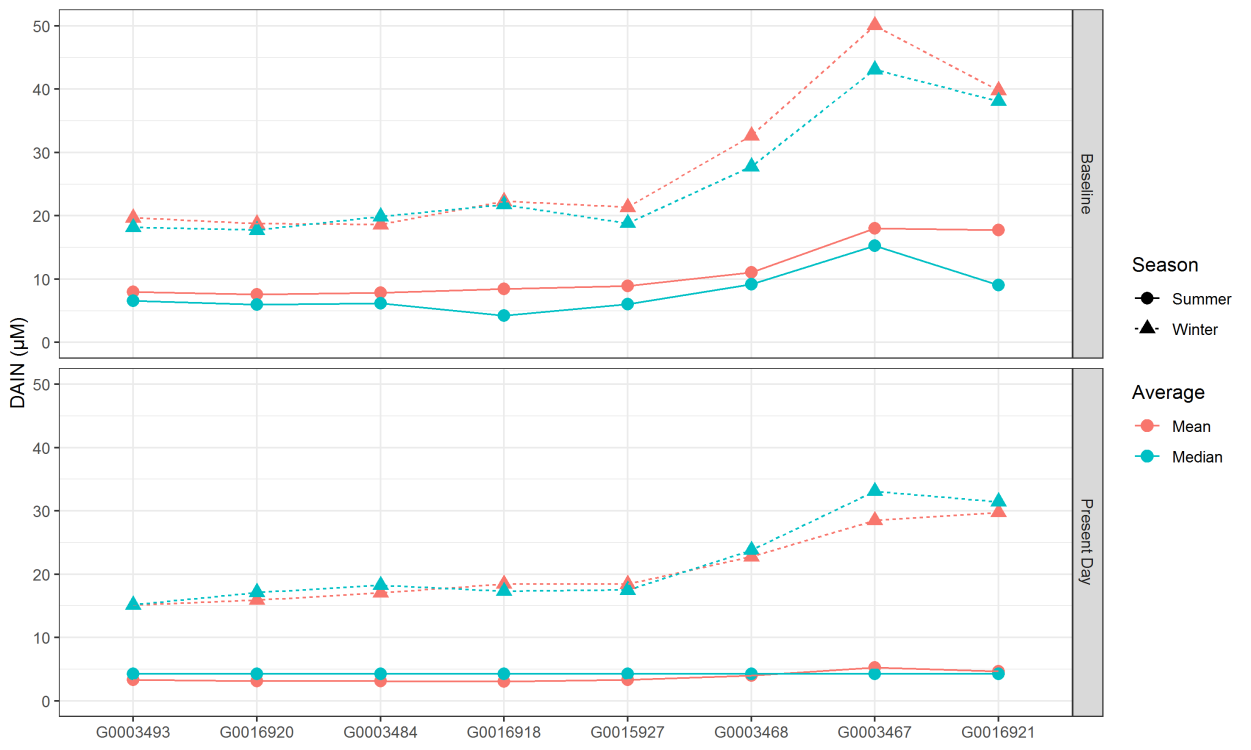


/home/nannil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


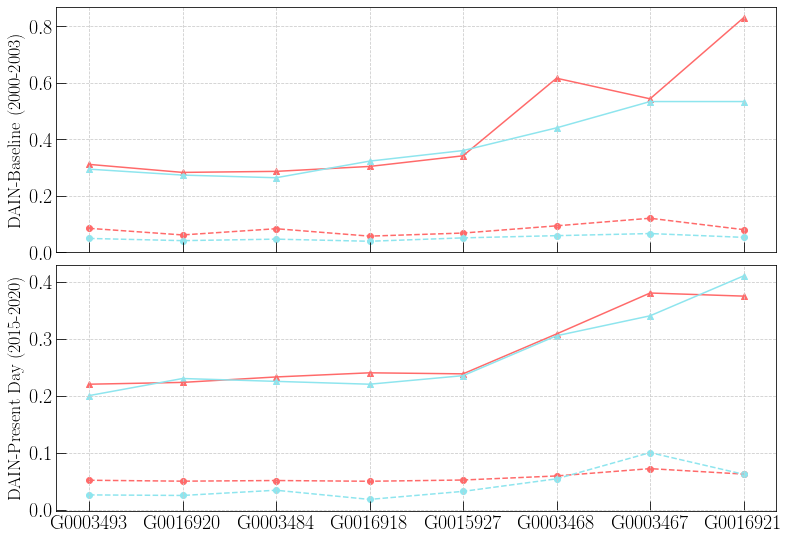

In [53]:
fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10,7))

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)

axes[0].scatter(range(0, len(dain_summer_mean_pd)), dain_summer_mean_bl, marker="o", color="#FF6A6A")
axes[0].scatter(range(0, len(dain_summer_median_bl)), dain_summer_median_bl, marker="o", color="#8EE5EE")

axes[0].scatter(range(0, len(dain_winter_mean_bl)), dain_winter_mean_bl, marker="^", color="#FF6A6A")
axes[0].scatter(range(0, len(dain_winter_median_bl)), dain_winter_median_bl, marker="^", color="#8EE5EE")

axes[0].plot(range(0, len(dain_summer_mean_bl)), dain_summer_mean_bl, linestyle="--", color="#FF6A6A", linewidth=1.5)
axes[0].plot(range(0, len(dain_summer_median_bl)), dain_summer_median_bl, linestyle="--", color="#8EE5EE", linewidth=1.5)

axes[0].plot(range(0, len(dain_winter_mean_bl)), dain_winter_mean_bl, linestyle="-", color="#FF6A6A", linewidth=1.5)
axes[0].plot(range(0, len(dain_winter_median_bl)), dain_winter_median_bl, linestyle="-", color="#8EE5EE", linewidth=1.5)




axes[1].scatter(range(0, len(dain_summer_mean_pd)), dain_summer_mean_pd, marker="o", color="#FF6A6A")
axes[1].scatter(range(0, len(dain_summer_median_pd)), dain_summer_median_pd, marker="o", color="#8EE5EE")

axes[1].scatter(range(0, len(dain_winter_mean_pd)), dain_winter_mean_pd, marker="^", color="#FF6A6A")
axes[1].scatter(range(0, len(dain_winter_median_pd)), dain_winter_median_pd, marker="^", color="#8EE5EE")


axes[1].plot(range(0, len(dain_summer_mean_pd)), dain_summer_mean_pd, linestyle="--", color="#FF6A6A", linewidth=1.5)
axes[1].plot(range(0, len(dain_summer_median_pd)), dain_summer_median_pd, linestyle="--", color="#8EE5EE", linewidth=1.5)

axes[1].plot(range(0, len(dain_winter_mean_pd)), dain_winter_mean_pd, linestyle="-", color="#FF6A6A", linewidth=1.5)
axes[1].plot(range(0, len(dain_winter_median_pd)), dain_winter_median_pd, linestyle="-", color="#8EE5EE", linewidth=1.5)

axes[1].set_xticklabels(["", "G0003493", "G0016920", "G0003484", "G0016918", "G0015927", \
               "G0003468", "G0003467", "G0016921"])

axes[0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0].grid(which='major', color='#CCCCCC', linestyle='--')

axes[1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1].grid(which='major', color='#CCCCCC', linestyle='--')

axes[0].set_ylabel("DAIN-Baseline (2000-2003)", fontsize=18)
axes[1].set_ylabel("DAIN-Present Day (2015-2020)", fontsize=18)


fig.savefig("./Plots/DAINtime.png",  facecolor='white', transparent=False, bbox_inches = 'tight')

In [ ]:
# we do not have data in the same locations, in these locations we have data up to 2005

### Figure 7 in report:




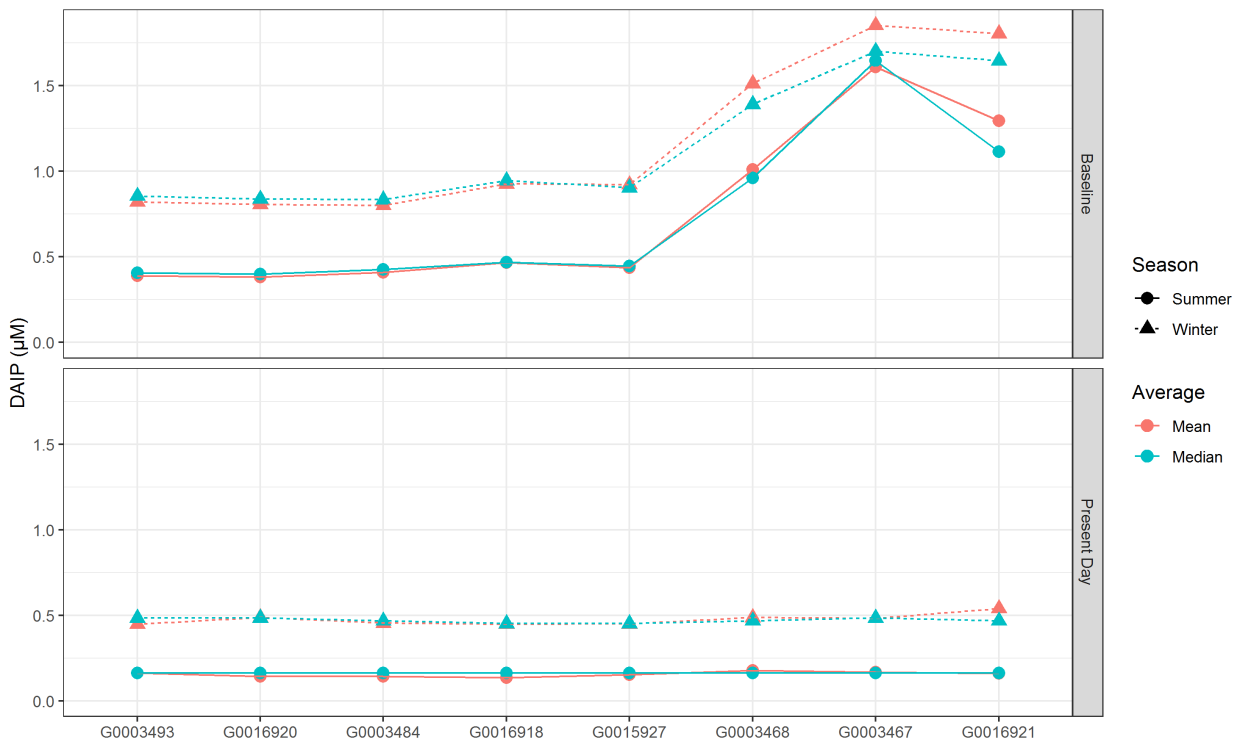


/home/nannil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


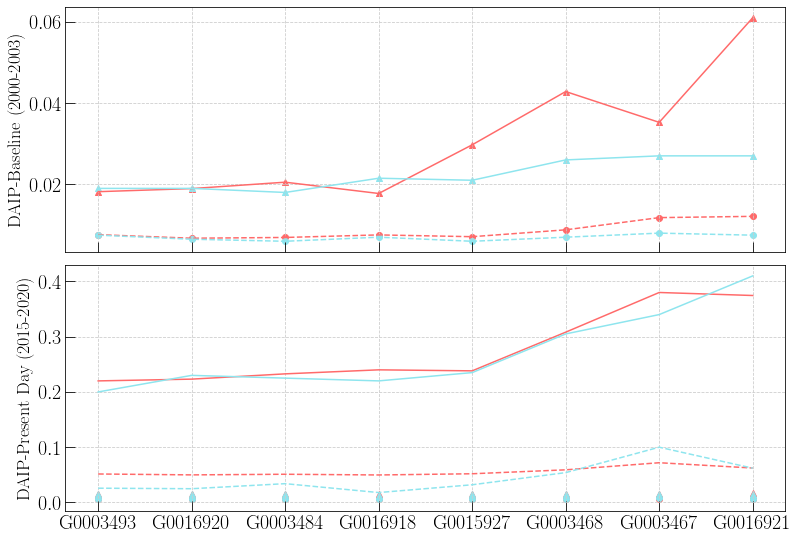

In [60]:
fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10,7))

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)

axes[0].scatter(range(0, len(daip_summer_mean_pd)), daip_summer_mean_bl, marker="o", color="#FF6A6A")
axes[0].scatter(range(0, len(daip_summer_median_bl)), daip_summer_median_bl, marker="o", color="#8EE5EE")

axes[0].scatter(range(0, len(daip_winter_mean_bl)), daip_winter_mean_bl, marker="^", color="#FF6A6A")
axes[0].scatter(range(0, len(daip_winter_median_bl)), daip_winter_median_bl, marker="^", color="#8EE5EE")

axes[0].plot(range(0, len(daip_summer_mean_bl)), daip_summer_mean_bl, linestyle="--", color="#FF6A6A", linewidth=1.5)
axes[0].plot(range(0, len(dain_summer_median_bl)), daip_summer_median_bl, linestyle="--", color="#8EE5EE", linewidth=1.5)

axes[0].plot(range(0, len(daip_winter_mean_bl)), daip_winter_mean_bl, linestyle="-", color="#FF6A6A", linewidth=1.5)
axes[0].plot(range(0, len(daip_winter_median_bl)), daip_winter_median_bl, linestyle="-", color="#8EE5EE", linewidth=1.5)




axes[1].scatter(range(0, len(daip_summer_mean_pd)), daip_summer_mean_pd, marker="o", color="#FF6A6A")
axes[1].scatter(range(0, len(daip_summer_median_pd)), daip_summer_median_pd, marker="o", color="#8EE5EE")

axes[1].scatter(range(0, len(daip_winter_mean_pd)), daip_winter_mean_pd, marker="^", color="#FF6A6A")
axes[1].scatter(range(0, len(daip_winter_median_pd)), daip_winter_median_pd, marker="^", color="#8EE5EE")


axes[1].plot(range(0, len(dain_summer_mean_pd)), dain_summer_mean_pd, linestyle="--", color="#FF6A6A", linewidth=1.5)
axes[1].plot(range(0, len(dain_summer_median_pd)), dain_summer_median_pd, linestyle="--", color="#8EE5EE", linewidth=1.5)

axes[1].plot(range(0, len(dain_winter_mean_pd)), dain_winter_mean_pd, linestyle="-", color="#FF6A6A", linewidth=1.5)
axes[1].plot(range(0, len(dain_winter_median_pd)), dain_winter_median_pd, linestyle="-", color="#8EE5EE", linewidth=1.5)

axes[1].set_xticklabels(["", "G0003493", "G0016920", "G0003484", "G0016918", "G0015927", \
               "G0003468", "G0003467", "G0016921"])

axes[0].set_ylabel("DAIP-Baseline (2000-2003)", fontsize=18)
axes[1].set_ylabel("DAIP-Present Day (2015-2020)", fontsize=18)


axes[0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0].grid(which='major', color='#CCCCCC', linestyle='--')

axes[1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1].grid(which='major', color='#CCCCCC', linestyle='--')
fig.savefig("./Plots/DAIPtime.png",  facecolor='white', transparent=False, bbox_inches = 'tight')

In [62]:
ch_summer_mean_bl = []
ch_summer_median_bl = []
ch_winter_mean_bl = []
ch_winter_median_bl = []

for df_ in site_df_list:
    ch_summer_mean_bl.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", 947, location_type="label")[1]))
    ch_summer_median_bl.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", 947,  location_type="label")[1]))
    
    ch_winter_mean_bl.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", 947,location_type="label")[3]))
    ch_winter_median_bl.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", 947,  location_type="label")[3]))

ch_summer_mean_pd = []
ch_summer_median_pd = []
ch_winter_mean_pd = []
ch_winter_median_pd = []

for df_ in site_df_list:
    ch_summer_mean_pd.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "", 947, location_type="label")[1]))
    ch_summer_median_pd.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",947, location_type="label")[1]))
    
    ch_winter_mean_pd.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",947, location_type="label")[3]))
    ch_winter_median_pd.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",947, location_type="label")[3]))

/home/nannil/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/nannil/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Figure 8 in report:



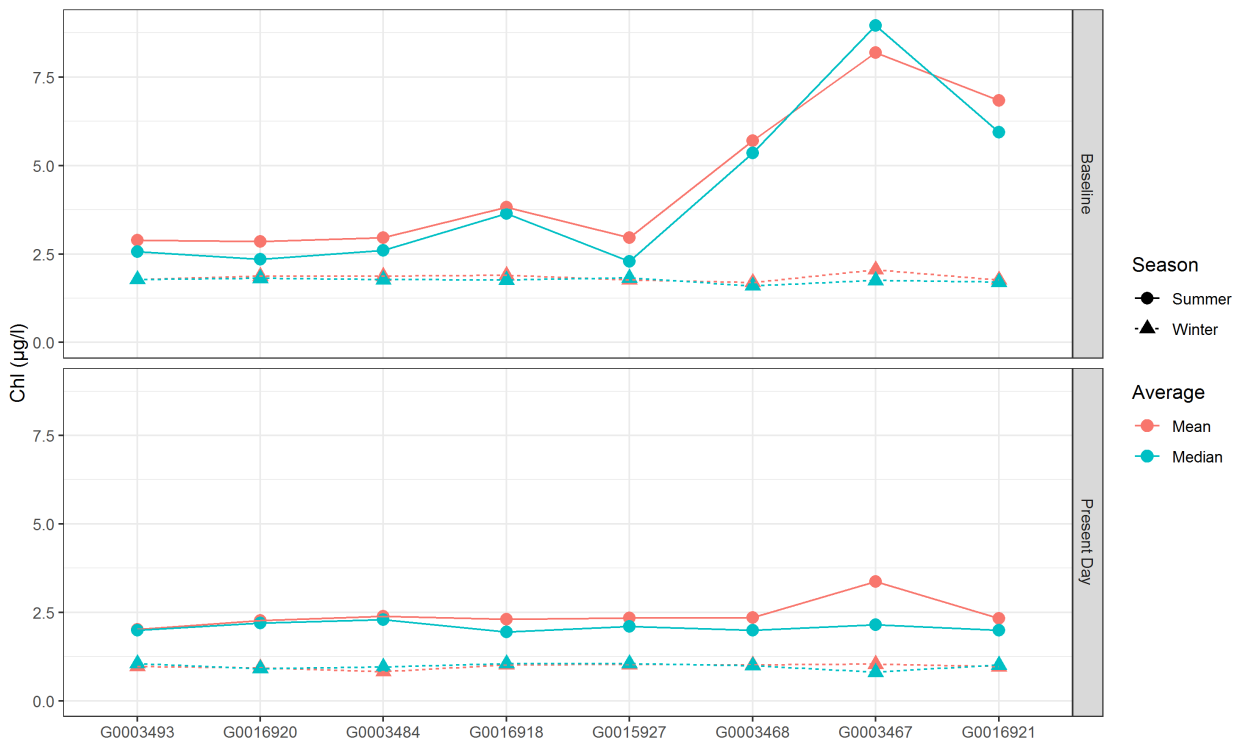


/home/nannil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


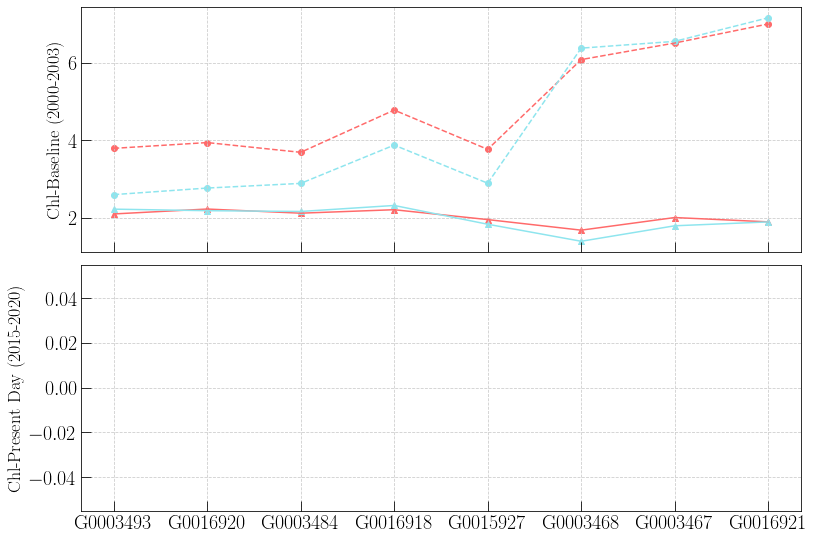

In [64]:
fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10,7))

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)

axes[0].scatter(range(0, len(ch_summer_mean_pd)), ch_summer_mean_bl, marker="o", color="#FF6A6A")
axes[0].scatter(range(0, len(ch_summer_median_bl)), ch_summer_median_bl, marker="o", color="#8EE5EE")

axes[0].scatter(range(0, len(ch_winter_mean_bl)), ch_winter_mean_bl, marker="^", color="#FF6A6A")
axes[0].scatter(range(0, len(ch_winter_median_bl)), ch_winter_median_bl, marker="^", color="#8EE5EE")

axes[0].plot(range(0, len(ch_summer_mean_bl)), ch_summer_mean_bl, linestyle="--", color="#FF6A6A", linewidth=1.5)
axes[0].plot(range(0, len(ch_summer_median_bl)), ch_summer_median_bl, linestyle="--", color="#8EE5EE", linewidth=1.5)

axes[0].plot(range(0, len(ch_winter_mean_bl)), ch_winter_mean_bl, linestyle="-", color="#FF6A6A", linewidth=1.5)
axes[0].plot(range(0, len(ch_winter_median_bl)), ch_winter_median_bl, linestyle="-", color="#8EE5EE", linewidth=1.5)




axes[1].scatter(range(0, len(ch_summer_mean_pd)), ch_summer_mean_pd, marker="o", color="#FF6A6A")
axes[1].scatter(range(0, len(ch_summer_median_pd)), ch_summer_median_pd, marker="o", color="#8EE5EE")

axes[1].scatter(range(0, len(ch_winter_mean_pd)), ch_winter_mean_pd, marker="^", color="#FF6A6A")
axes[1].scatter(range(0, len(ch_winter_median_pd)), ch_winter_median_pd, marker="^", color="#8EE5EE")


axes[1].plot(range(0, len(ch_summer_mean_pd)), ch_summer_mean_pd, linestyle="--", color="#FF6A6A", linewidth=1.5)
axes[1].plot(range(0, len(ch_summer_median_pd)), ch_summer_median_pd, linestyle="--", color="#8EE5EE", linewidth=1.5)

axes[1].plot(range(0, len(ch_winter_mean_pd)), ch_winter_mean_pd, linestyle="-", color="#FF6A6A", linewidth=1.5)
axes[1].plot(range(0, len(ch_winter_median_pd)), ch_winter_median_pd, linestyle="-", color="#8EE5EE", linewidth=1.5)

axes[1].set_xticklabels(["", "G0003493", "G0016920", "G0003484", "G0016918", "G0015927", \
               "G0003468", "G0003467", "G0016921"])

axes[0].set_ylabel("Chl-Baseline (2000-2003)", fontsize=18)
axes[1].set_ylabel("Chl-Present Day (2015-2020)", fontsize=18)


axes[0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0].grid(which='major', color='#CCCCCC', linestyle='--')

axes[1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1].grid(which='major', color='#CCCCCC', linestyle='--')

fig.savefig("./Plots/Chltime.png",  facecolor='white', transparent=False, bbox_inches = 'tight')

In [67]:
sal_summer_mean_bl = []
sal_summer_median_bl = []
sal_winter_mean_bl = []
sal_winter_median_bl = []

for df_ in site_df_list:
    sal_summer_mean_bl.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", 7608,  location_type="label")[1]))
    sal_summer_median_bl.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", 7608,  location_type="label")[1]))
    
    sal_winter_mean_bl.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", 7608,  location_type="label")[3]))
    sal_winter_median_bl.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]<=2003], "", 7608,  location_type="label")[3]))

sal_summer_mean_pd = []
sal_summer_median_pd = []
sal_winter_mean_pd = []
sal_winter_median_pd = []

for df_ in site_df_list:
    sal_summer_mean_pd.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "", 7608,  location_type="label")[1]))
    sal_summer_median_pd.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",7608,  location_type="label")[1]))
    
    sal_winter_mean_pd.append(np.mean(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",7608,  location_type="label")[3]))
    sal_winter_median_pd.append(np.median(wqfn.nutrient_time_seasons(df_[df_["yr"]>=2015], "",7608,  location_type="label")[3]))

### Figure 9 in report:




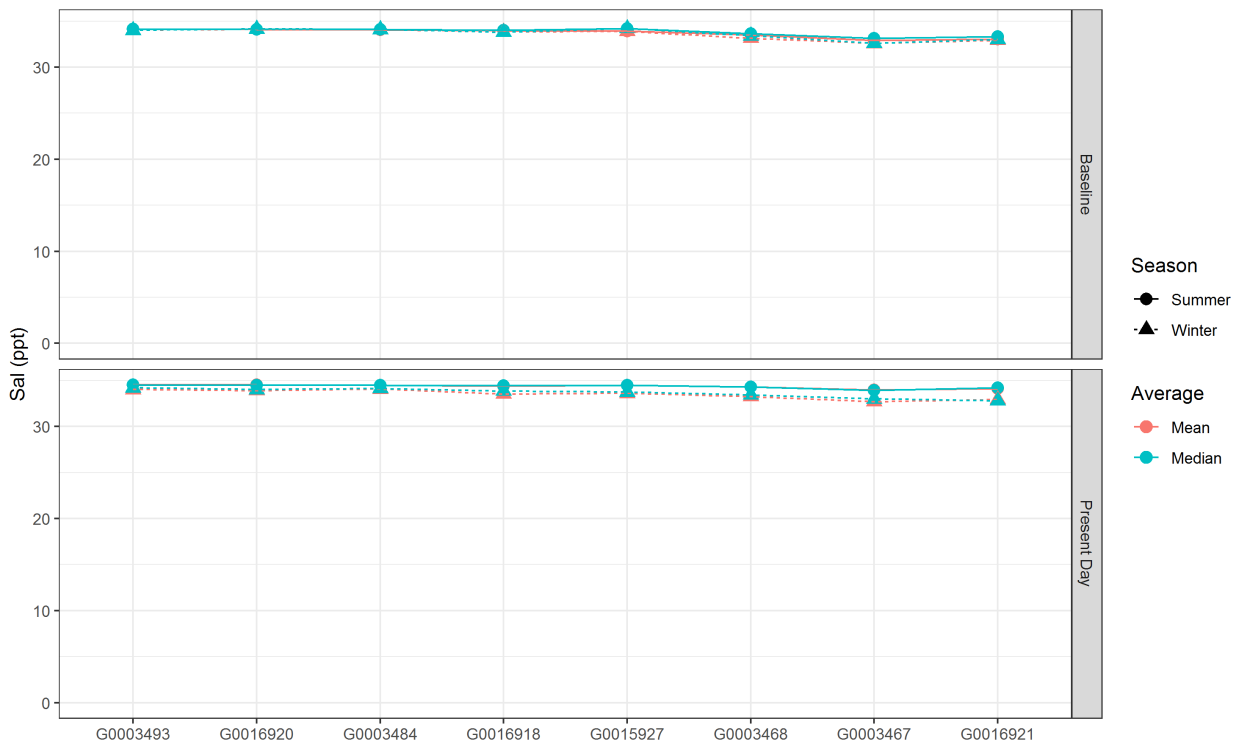


/home/nannil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator


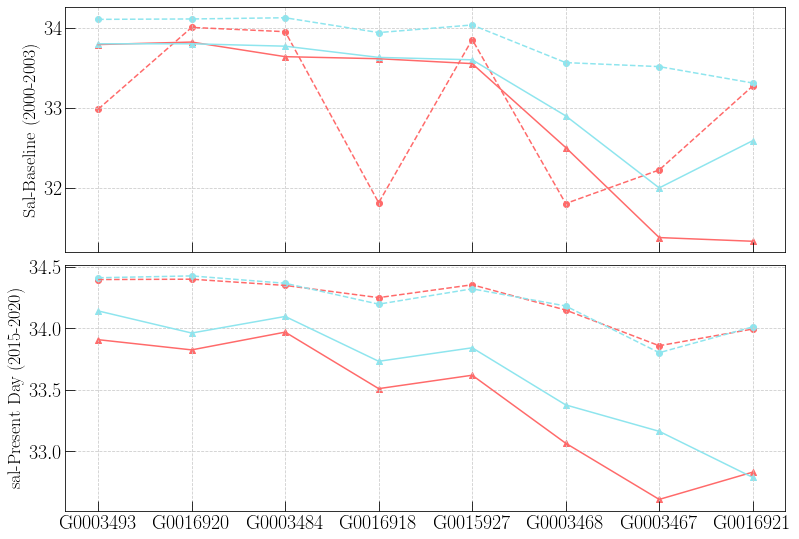

In [69]:
fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10,7))

fig.subplots_adjust(0,0,1.,1.,0.05,0.05)

axes[0].scatter(range(0, len(sal_summer_mean_pd)), sal_summer_mean_bl, marker="o", color="#FF6A6A")
axes[0].scatter(range(0, len(sal_summer_median_bl)), sal_summer_median_bl, marker="o", color="#8EE5EE")

axes[0].scatter(range(0, len(sal_winter_mean_bl)), sal_winter_mean_bl, marker="^", color="#FF6A6A")
axes[0].scatter(range(0, len(sal_winter_median_bl)), sal_winter_median_bl, marker="^", color="#8EE5EE")

axes[0].plot(range(0, len(sal_summer_mean_bl)), sal_summer_mean_bl, linestyle="--", color="#FF6A6A", linewidth=1.5)
axes[0].plot(range(0, len(sal_summer_median_bl)), sal_summer_median_bl, linestyle="--", color="#8EE5EE", linewidth=1.5)

axes[0].plot(range(0, len(sal_winter_mean_bl)), sal_winter_mean_bl, linestyle="-", color="#FF6A6A", linewidth=1.5)
axes[0].plot(range(0, len(sal_winter_median_bl)), sal_winter_median_bl, linestyle="-", color="#8EE5EE", linewidth=1.5)




axes[1].scatter(range(0, len(sal_summer_mean_pd)), sal_summer_mean_pd, marker="o", color="#FF6A6A")
axes[1].scatter(range(0, len(sal_summer_median_pd)), sal_summer_median_pd, marker="o", color="#8EE5EE")

axes[1].scatter(range(0, len(sal_winter_mean_pd)), sal_winter_mean_pd, marker="^", color="#FF6A6A")
axes[1].scatter(range(0, len(sal_winter_median_pd)), sal_winter_median_pd, marker="^", color="#8EE5EE")


axes[1].plot(range(0, len(sal_summer_mean_pd)), sal_summer_mean_pd, linestyle="--", color="#FF6A6A", linewidth=1.5)
axes[1].plot(range(0, len(sal_summer_median_pd)), sal_summer_median_pd, linestyle="--", color="#8EE5EE", linewidth=1.5)

axes[1].plot(range(0, len(sal_winter_mean_pd)), sal_winter_mean_pd, linestyle="-", color="#FF6A6A", linewidth=1.5)
axes[1].plot(range(0, len(sal_winter_median_pd)), sal_winter_median_pd, linestyle="-", color="#8EE5EE", linewidth=1.5)

axes[1].set_xticklabels(["", "G0003493", "G0016920", "G0003484", "G0016918", "G0015927", \
               "G0003468", "G0003467", "G0016921"])

axes[0].set_ylabel("Sal-Baseline (2000-2003)", fontsize=18)
axes[1].set_ylabel("sal-Present Day (2015-2020)", fontsize=18)


axes[0].grid(which='major', color='#CCCCCC', linestyle='--')
axes[0].grid(which='major', color='#CCCCCC', linestyle='--')

axes[1].grid(which='major', color='#CCCCCC', linestyle='--')
axes[1].grid(which='major', color='#CCCCCC', linestyle='--')
fig.savefig("./Plots/salinity.png",  facecolor='white', transparent=False, bbox_inches = 'tight')